<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [215]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
import keras

In [216]:
data_dir = '/content/gdrive/MyDrive/Data' 

In [219]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data/Data2')

Found 585 files belonging to 2 classes.


In [220]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [221]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [222]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train.map(process)
validation_df = val.map(process)

In [223]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(36, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(rate=0.1))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))

In [224]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 125, 125, 36)      5220      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 62, 62, 36)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 60, 60, 64)        20800     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 30, 30, 64)     

In [225]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [226]:
early = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='auto')

check = ModelCheckpoint(monitor='val_accuracy',filepath="./bestmodel.h5", save_best_only=True, verbose=1, mode='auto')

call = [early,check]

In [227]:
history = model.fit(train,epochs=20,validation_data=val,callbacks=call)

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 27.3222 - accuracy: 0.6370
Epoch 1: val_accuracy improved from -inf to 0.73958, saving model to ./bestmodel.h5
13/13 [==============================] - 5s 274ms/step - loss: 27.3222 - accuracy: 0.6370 - val_loss: 0.7481 - val_accuracy: 0.7396
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 1.2403 - accuracy: 0.5841
Epoch 2: val_accuracy did not improve from 0.73958
13/13 [==============================] - 4s 257ms/step - loss: 1.2403 - accuracy: 0.5841 - val_loss: 0.4964 - val_accuracy: 0.7292
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 0.5619 - accuracy: 0.7260
Epoch 3: val_accuracy improved from 0.73958 to 0.79167, saving model to ./bestmodel.h5
13/13 [==============================] - 4s 261ms/step - loss: 0.5619 - accuracy: 0.7260 - val_loss: 0.4200 - val_accuracy: 0.7917
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.7837
Epoch 4

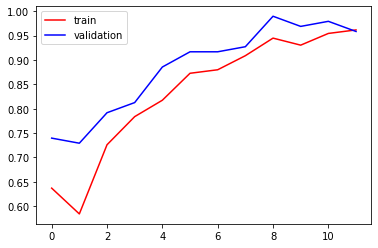

In [228]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

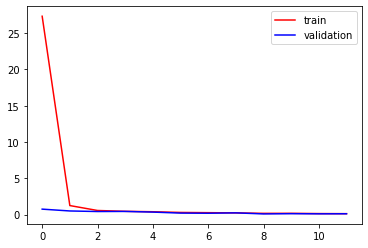

In [229]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [230]:
accuracy = model.evaluate(test)[1] * 100
print("Accuracy:",accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.1020 - accuracy: 0.9688
Accuracy: 96.875


In [239]:
img = keras.preprocessing.image.load_img(
    "/content/tumor.png", target_size=(256,256)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent tumor and %.2f percent no tumor."
    % (100 * (1 - score), 100 * score)
)

This image is 6.09 percent tumor and 93.91 percent no tumor.
